# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

#### 4.1 Training the agent

##### 4.1.1 Defining the training function

Besides returning the raw score achieved by the agent, the function also calculates and returnes the moving average (with the basis of 100) of the scores. It is used as a means of establishing when the environment can be deemed solved (as per the requirements of the environment: 'agent must get an average score of +13 over 100 consecutive episodes').  

In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, checkpoint_suffix=''):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end   (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    moving_avgs = []                   # list of moving averages
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        state = env_info.vector_observations[0]           # get current state
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]       # send action to environment
            next_state = env_info.vector_observations[0]  # get next state
            reward = env_info.rewards[0]                  # get reward
            done = env_info.local_done[0]                 # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores.append(score)                # save score for plotting
        scores_window.append(score)         # save score for moving average
        moving_avg = np.mean(scores_window) # calculate moving average
        moving_avgs.append(moving_avg)      # save moving average
        eps = max(eps_end, eps_decay*eps)   # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg))
            
        if moving_avg >= 13.10:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avg))
            checkpoint_name = 'checkpoint{}.pth'.format(checkpoint_suffix)
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_name)
            break
            
    return scores, moving_avgs

##### 4.1.2 Running the training with different hyperparameters

To show the differences in the trained agent according to the chosen hyperparameters, the training is run with diefferent hyperparameter values.

In [9]:
from dqn_agent import Agent
from collections import deque
import torch

#to keep udacity workspace from getting idle while training
from workspace_utils import active_session

In [10]:
## With default hiperparameter values inspired by the original research paper on the Deep Q-Learning algorithm
with active_session():
    agent = Agent(state_size=state_size, action_size=action_size, seed=66)
    scores, avgs = dqn(checkpoint_suffix='default')

Episode 100	Average Score: 0.40
Episode 200	Average Score: 2.97
Episode 300	Average Score: 6.86
Episode 400	Average Score: 9.59
Episode 500	Average Score: 12.38
Episode 554	Average Score: 13.13
Environment solved in 454 episodes!	Average Score: 13.13


In [11]:
## With tweaked hipeparameter values to make the model converge faster
with active_session():
    agent = Agent(state_size=state_size, action_size=action_size, seed=66)
    scores, avgs = dqn(n_episodes=1000, eps_start=1.0, eps_end=0.02, eps_decay=0.95, checkpoint_suffix='tweaked')

Episode 100	Average Score: 2.99
Episode 200	Average Score: 9.61
Episode 300	Average Score: 12.08
Episode 335	Average Score: 13.17
Environment solved in 235 episodes!	Average Score: 13.17


#### 4.2 Plotting the results

Only the results for the model that converged faster are shown on the plot.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

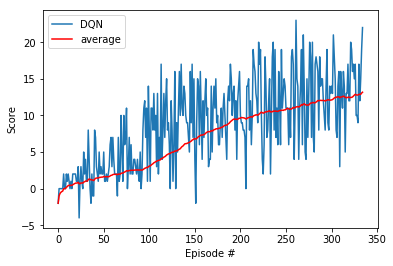

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

### 5. Test the saved agents

##### 5.1 Test for the agent traind with default hyperparameter values

Episode 1	Average Score: 20.00
Episode 2	Average Score: 12.00
Episode 3	Average Score: 15.67
Episode 4	Average Score: 12.50
Episode 5	Average Score: 11.00
Episode 6	Average Score: 12.83
Episode 7	Average Score: 12.00
Episode 8	Average Score: 12.75
Episode 9	Average Score: 13.22
Episode 10	Average Score: 14.10


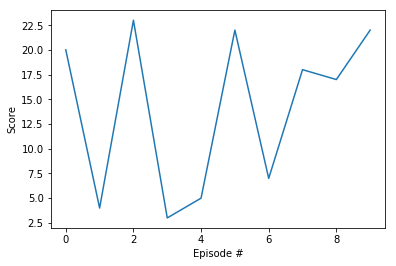

In [15]:
# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=66)

# load the weights from file
checkpoint = 'checkpointdefault.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the env
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # is episode done?

        score += reward                                # update the score
        state = next_state                             # set state to next state
        if done:                                       # are we done yet?
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

##### 5.1 Test for the agent traind with tweaked hyperparameter values

Episode 1	Average Score: 22.00
Episode 2	Average Score: 15.50
Episode 3	Average Score: 13.67
Episode 4	Average Score: 13.25
Episode 5	Average Score: 12.60
Episode 6	Average Score: 12.00
Episode 7	Average Score: 13.00
Episode 8	Average Score: 13.00
Episode 9	Average Score: 13.33
Episode 10	Average Score: 13.50


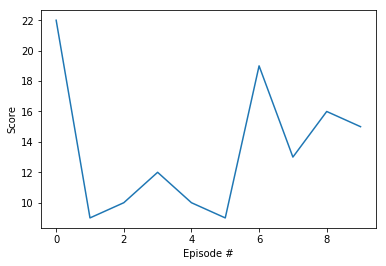

In [16]:
# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=66)

# load the weights from file
checkpoint = 'checkpointtweaked.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the env
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # is episode done?

        score += reward                                # update the score
        state = next_state                             # set state to next state
        if done:                                       # are we done yet?
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [17]:
#closing the environment
env.close()